{4.0: (1.2519531249999536-0.17591141014371794j), 4.1: (0.6247985697486834-0.0351927982926008j), 4.199999999999999: (-1.981766398998987-0.19070467704519523j), 4.299999999999999: (2.372550299454039-0.18362636397363918j), 4.399999999999999: (-1.7838628371329923-0.2930798860636223j), 4.499999999999998: (0.8650820164449398-0.16309432753572514j), 4.599999999999998: (-0.16455421154275773-0.09927598950327521j), 4.6999999999999975: (-1.3350905186127242+0.11495551133623483j), 4.799999999999997: (1.8897507732775738+0.24004506232893807j), 4.899999999999997: (-1.88174049419426-0.05632972016994453j), 4.9999999999999964: (1.1300700732036228-0.19442537064408016j), 5.099999999999996: (0.13605300733348447-0.1694162541179789j), 5.199999999999996: (-0.9387977275899917-0.1182738093252601j), 5.299999999999995: (1.2582980094065261+0.019275919302632172j), 5.399999999999995: (-1.4202206269737374+0.02493916379651162j), 5.499999999999995: (0.7320170456419917-0.09519273216043983j), 5.599999999999994: (-0.36859551

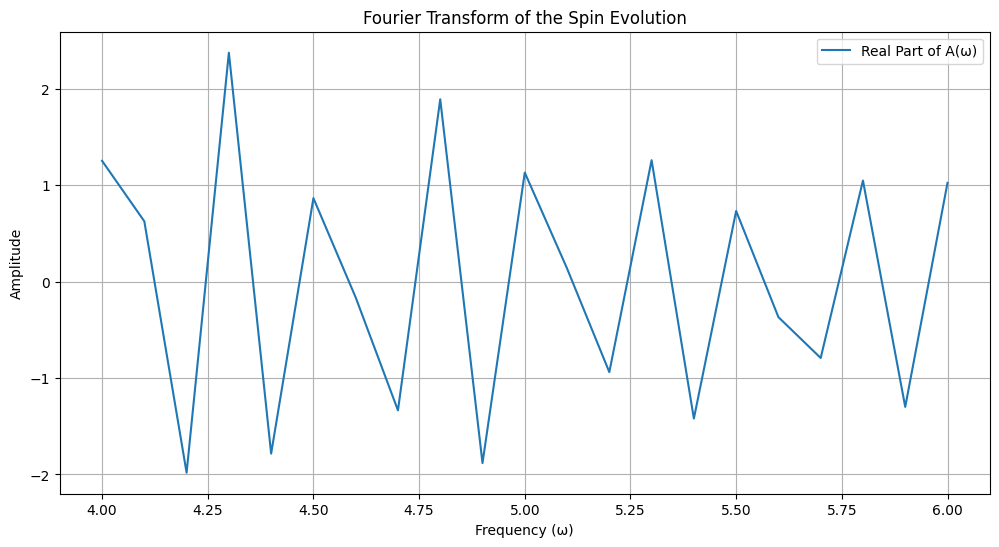

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend = FakeManilaV2()

# Constants
omega_0 = 1.0  # Frequency of the spin in the magnetic field
N = 96 
time_interval = np.pi / (12 * omega_0)  # τ time interval

# Aarrays to store results
ntaus = np.arange(-N, N + 1) * time_interval
steps = len(ntaus) # n
expected_values = np.zeros(len(ntaus))

omegas = np.arange(4, 6.1, 0.1)
result = dict()


def f(omega, ntau):
    # Create a quantum circuit with 1 qubit and 1 classical bit for measurement
    qc = QuantumCircuit(1, 1)
    # Prepare the qubit in a superposition state
    qc.h(0)
    # Apply Rz gate to evolve the state
    qc.rz(2*ntau, 0)
    # Rotate the state for X-basis measurement
    qc.ry(-np.pi/2, 0)
    # Measure the qubit in the Z basis (after Ry gate, this corresponds to X-basis)
    qc.measure(0, 0)
    
    # Transpile the circuit for the simulator backend
    transpiled_qc = transpile(qc, backend)
    transpiled_circuit = transpile(qc, backend)
    # Execute the circuit on the simulator
    job = backend.run(transpiled_qc, shots=1024)
    result = job.result()
    
    # Get the measurement counts
    counts = result.get_counts()
    
    # Calculate the expectation value <σx> = P(0) - P(1)
    p0 = counts.get('0', 0) / 1024
    p1 = counts.get('1', 0) / 1024
    expected_value = p0 - p1
    return expected_value * np.exp(1j*omega*ntau)


for omega in omegas: 
    sum = 0
    for ntau in ntaus:
        sum += f(omega, ntau)
    result[omega] = sum
    
    
with open('result.csv', 'a') as file:
    for key, value in result.items():
        file.write(f'{key} {value}\n')
    
    
print(result)

print(np.real(list(result.values())))
        
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(result.keys(), np.real(list(result.values())), label="Real Part of A(ω)")
plt.title('Fourier Transform of the Spin Evolution')
plt.xlabel('Frequency (ω)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()